# Imports

In [1]:
import numpy as np
import pandas as pd
import sqlalchemy

import os
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

In [2]:
from functions import load_balanced_df

In [3]:
HOPOPT_df = load_balanced_df(directory='HOPOPT', sample_size=1000)
HOPOPT_df.shape

(2558, 83)

In [4]:
TCP_df = load_balanced_df(directory='TCP', sample_size=1000)
TCP_df.shape

(18482, 83)

In [5]:
UDP_df = load_balanced_df(directory='UDP', sample_size=1000)
UDP_df.shape

(22000, 83)

In [6]:
balanced_df = pd.concat([HOPOPT_df, TCP_df, UDP_df])
del HOPOPT_df, TCP_df, UDP_df
balanced_df.reset_index(drop=True, inplace=True)
balanced_df.shape

(43040, 83)

In [15]:
balanced_df.columns

Index(['Flow_ID', 'Flow_Duration', 'Fwd_Total_Pkts', 'Bwd_Total_Pkts',
       'Fwd_Total_Bytes', 'Bwd_Total_Bytes', 'Fwd_Pkt_Length_Max',
       'Fwd_Pkt_Length_Min', 'Fwd_Pkt_Length_Mean', 'Fwd_Pkt_Length_Std',
       'Bwd_Pkt_Length_Max', 'Bwd_Pkt_Length_Min', 'Bwd_Pkt_Length_Mean',
       'Bwd_Pkt_Length_Std', 'Flow_Bytes_Sec', 'Flow_Pkts_Sec',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Pkts_Sec', 'Bwd_Pkts_Sec', 'Pkt_Length_Min',
       'Pkt_Length_Max', 'Pkt_Length_Mean', 'Pkt_Length_Std', 'Pkt_Length_Var',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count',
       'ACK_Flag_Count', 'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Fl

Change all benign lables to simply 'benign'

In [7]:
benign_filt = balanced_df['Malicious'] == 0
balanced_df['Label'] = np.where(benign_filt, 'Benign', balanced_df['Label'])

Check target distributions


In [8]:
balanced_df['Malicious'].value_counts()

1    21520
0    21520
Name: Malicious, dtype: int64

In [9]:
balanced_df['Label'].value_counts()

Benign     21520
TFTP        2291
Syn         2210
DNS         2195
NTP         2156
NetBIOS     2094
SNMP        2091
UDP         2064
MSSQL       1687
LDAP        1677
Portmap     1555
SSDP        1500
Name: Label, dtype: int64

# Model Results

In [10]:
model_scores = pd.read_csv('Model_Results/Model_Scores.csv', index_col=0)

In [11]:
feature_importances = pd.read_csv('Model_Results/Feature_Importances.csv', index_col=0)

In [12]:
model_scores

,Score,Bal_Binary_Dummy,Bal_Binary_GNB,Bal_Binary_DT,Bal_Binary_KNN,Bal_Binary_RF,Bal_Binary_XGB,Bal_Multicalss_Dummy,Bal_Multiclass_GNB,Bal_Multiclass_DT,Bal_Multiclass_KNN,Bal_Multiclass_RF,Bal_Multiclass_XGB
0,Accuracy,0.512182,0.822364,0.999091,0.997273,0.998727,1.0,0.000000,0.661636,0.924000,0.919636,0.928000,0.929455
1,F1_Score,0.512979,0.843855,0.999083,0.997254,0.998715,1.0,0.273325,0.843855,0.932673,0.926212,0.936837,0.938113


In [13]:
feature_importances.head()

,Feature,Bal_Binary_DT,Bal_Binary_RF,Bal_Binary_XGB,Bal_Multiclass_DT,Bal_Multiclass_RF,Bal_Multiclass_XGB
0,Feature_1,"('Fwd_Init_Win_Bytes', 0.6428306338135531)","('Fwd_Init_Win_Bytes', 0.13006379633919796)","('Pkt_Size_Mean', 0.36486617)","('Fwd_Init_Win_Bytes', 0.3760219415463435)","('Fwd_Init_Win_Bytes', 0.09528108518799236)","('Time_Idle_Std', 0.5322768)"
1,Feature_2,"('Pkt_Size_Mean', 0.1930210912747058)","('TCP', 0.07753190823840336)","('CWE_Flag_Count', 0.14011626)","('Pkt_Size_Mean', 0.2068695948593409)","('Pkt_Length_Min', 0.05587349828782531)","('CWE_Flag_Count', 0.09333151)"
2,Feature_3,"('ACK_Flag_Count', 0.06833403894335129)","('Pkt_Length_Min', 0.06621859113300392)","('Fwd_Init_Win_Bytes', 0.13416831)","('Pkt_Length_Max', 0.07462927073131587)","('Pkt_Size_Mean', 0.04205806720737576)","('Fwd_Pkt_Length_Std', 0.060551565)"
3,Feature_4,"('URG_Flag_Count', 0.018841893148837326)","('UDP', 0.05545832025128266)","('Fwd_Seg_Size_Min', 0.116157554)","('Fwd_Pkt_Length_Min', 0.06567930518050154)","('Fwd_Pkt_Length_Min', 0.042047606803231656)","('Fwd_Init_Win_Bytes', 0.039122608)"
4,Feature_5,"('Fwd_IAT_Std', 0.0170630742980684)","('PSH_Flag_Count', 0.04537413078590603)","('Fwd_PSH_Flags', 0.06968633)","('Fwd_IAT_Max', 0.05131909490594675)","('TCP', 0.04123283077516715)","('Pkt_Length_Min', 0.034679733)"


Most important features across all models

In [14]:
important_features = ['Fwd_Init_Win_Bytes', 'Pkt_Size_Mean', 'Time_Idle_Std', 'Pkt_Length_Mean', 'Pkt_Length_Min',
                      'Pkt_Length_Max', 'CWE_Flag_Count', 'TCP', 'UDP']
important_features

['Fwd_Init_Win_Bytes',
 'Pkt_Size_Mean',
 'Time_Idle_Std',
 'Pkt_Length_Mean',
 'Pkt_Length_Min',
 'Pkt_Length_Max',
 'CWE_Flag_Count',
 'TCP',
 'UDP']

# EDA

## By Protocol

[Text(0, 0, 'Benign'), Text(0, 0, 'Malicious')]

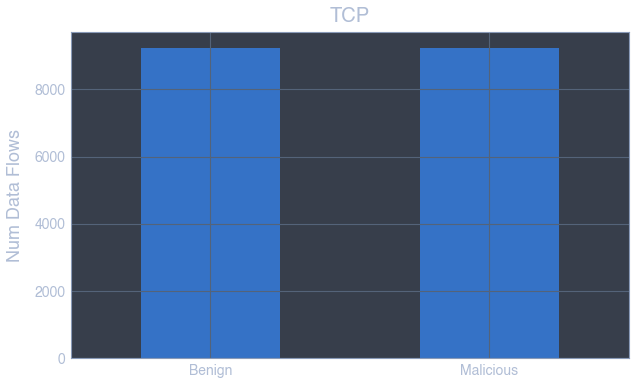

In [17]:
plot = balanced_df[balanced_df['TCP'] == 1]['Malicious'].value_counts(sort=False).plot(kind='bar', figsize=(10,6), fontsize=14)

plot.set_title('TCP', fontsize=20, pad=10)
plot.set_ylabel('Num Data Flows', fontsize=18, labelpad=10)
plot.set_xticklabels(['Benign', 'Malicious'], rotation=0)

[Text(0, 0, 'Benign'), Text(0, 0, 'Malicious')]

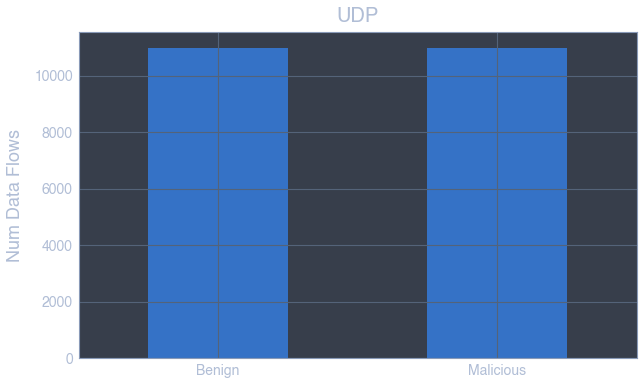

In [19]:
plot = balanced_df[balanced_df['UDP'] == 1]['Malicious'].value_counts(sort=False).plot(kind='bar', figsize=(10,6), fontsize=14)

plot.set_title('UDP', fontsize=20, pad=10)
plot.set_ylabel('Num Data Flows', fontsize=18, labelpad=10)
plot.set_xticklabels(['Benign', 'Malicious'], rotation=0)

[Text(0, 0, 'Benign'), Text(0, 0, 'Malicious')]

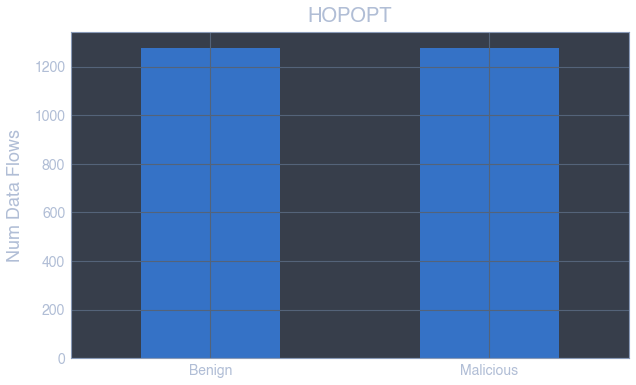

In [20]:
plot = balanced_df[balanced_df['HOPOPT'] == 1]['Malicious'].value_counts(sort=False).plot(kind='bar', figsize=(10,6), fontsize=14)

plot.set_title('HOPOPT', fontsize=20, pad=10)
plot.set_ylabel('Num Data Flows', fontsize=18, labelpad=10)
plot.set_xticklabels(['Benign', 'Malicious'], rotation=0)

## Initial Forward Flow Window

In [24]:
balanced_df[balanced_df['Malicious'] == 0]['Fwd_Init_Win_Bytes'].describe()

count     21520
unique      702
top          -1
freq      12279
Name: Fwd_Init_Win_Bytes, dtype: int64

In [22]:
balanced_df[balanced_df['Malicious'] == 1]['Fwd_Init_Win_Bytes'].describe()

count     21520
unique      100
top          -1
freq      12279
Name: Fwd_Init_Win_Bytes, dtype: int64

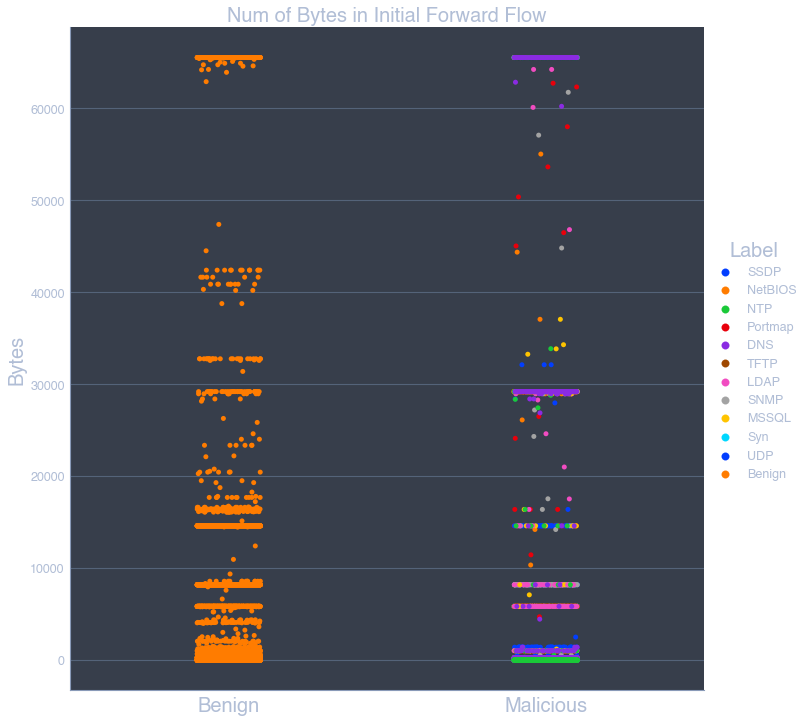

In [48]:
plot = sns.catplot(x='Malicious', y='Fwd_Init_Win_Bytes', hue='Label', palette='bright', data=balanced_df, height=10, aspect=1)

plt.title('Num of Bytes in Initial Forward Flow', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

#plt.savefig('Images/Fwd_Init_Win_Bytes.png', dpi = 100, bbox_inches='tight')

## Packet Size

In [49]:
balanced_df[balanced_df['Malicious'] == 0]['Pkt_Size_Mean'].describe()

count    21520.000000
mean       167.019486
std        336.056277
min          0.000000
25%         36.000000
50%         69.750000
75%        100.750000
max       7353.000000
Name: Pkt_Size_Mean, dtype: float64

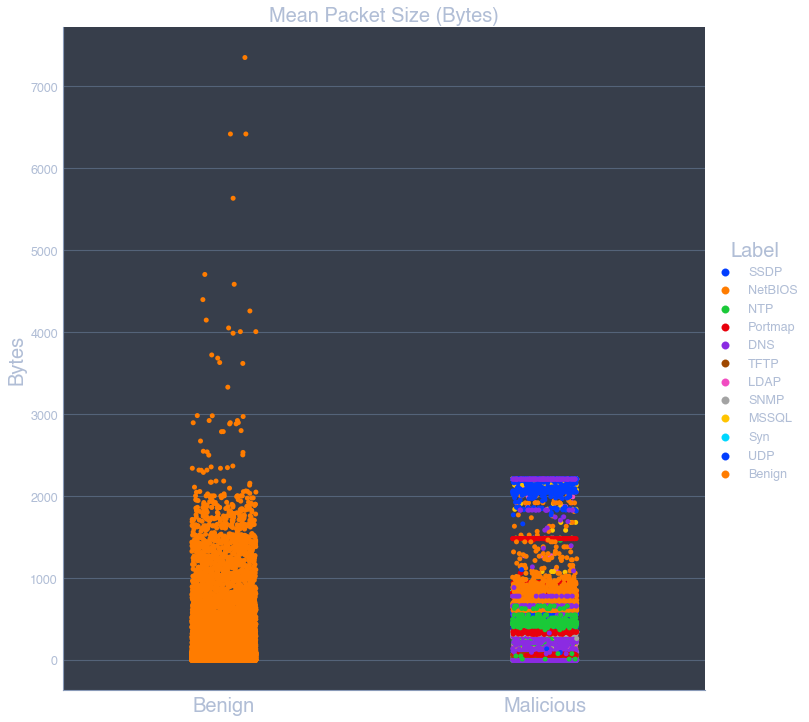

In [50]:
plot = sns.catplot(x='Malicious', y='Pkt_Size_Mean', hue='Label', palette='bright', data=balanced_df, height=10, aspect=1)

plt.title('Mean Packet Size (Bytes)', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

#plt.savefig('Images/Pkt_Size_Mean.png', dpi = 100, bbox_inches='tight')

In [51]:
balanced_df[balanced_df['Malicious'] == 0]['Pkt_Length_Mean'].describe()

count    21520.000000
mean       152.012725
std        305.992938
min          0.000000
25%         28.000000
50%         60.400000
75%         87.498346
max       4902.000000
Name: Pkt_Length_Mean, dtype: float64

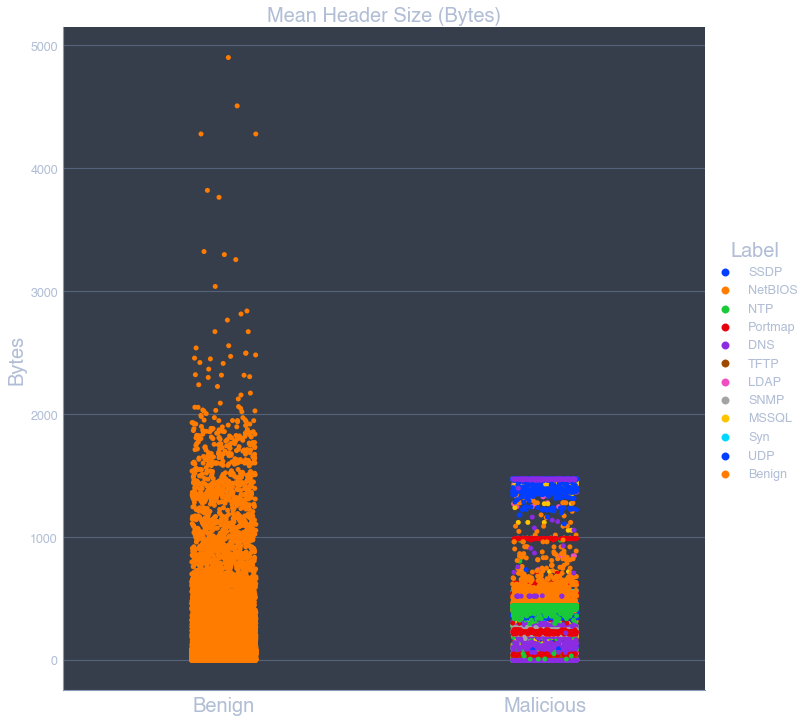

In [52]:
plot = sns.catplot(x='Malicious', y='Pkt_Length_Mean', hue='Label', palette='bright', data=balanced_df, height=10, aspect=1)

plt.title('Mean Header Size (Bytes)', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

#plt.savefig('Images/Pkt_Length_Mean.png', dpi = 100, bbox_inches='tight')

In [53]:
balanced_df[balanced_df['Malicious'] == 0]['Pkt_Length_Min'].describe()

count    21520.000000
mean        21.578764
std         43.354729
min          0.000000
25%          0.000000
50%         22.000000
75%         37.000000
max       1448.000000
Name: Pkt_Length_Min, dtype: float64

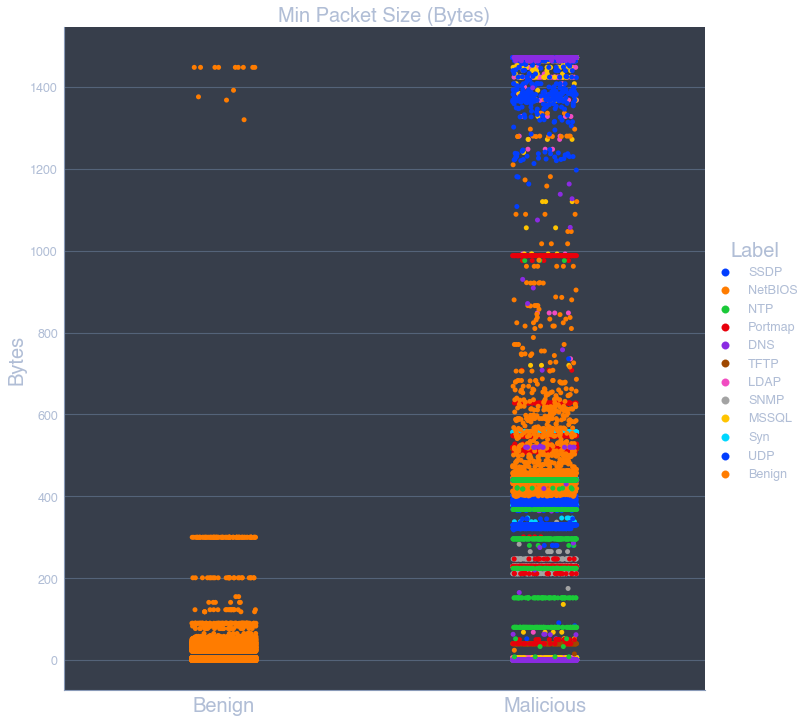

In [54]:
plot = sns.catplot(x='Malicious', y='Pkt_Length_Min', hue='Label', palette='bright', data=balanced_df, height=10, aspect=1)

plt.title('Min Packet Size (Bytes)', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

#plt.savefig('Images/Pkt_Length_Min.png', dpi = 100, bbox_inches='tight')

In [56]:
balanced_df[balanced_df['Malicious'] == 0]['Pkt_Length_Max'].describe()

count    21520.000000
mean       758.486013
std       1686.709764
min          0.000000
25%         46.000000
50%         99.000000
75%        459.000000
max      21900.000000
Name: Pkt_Length_Max, dtype: float64

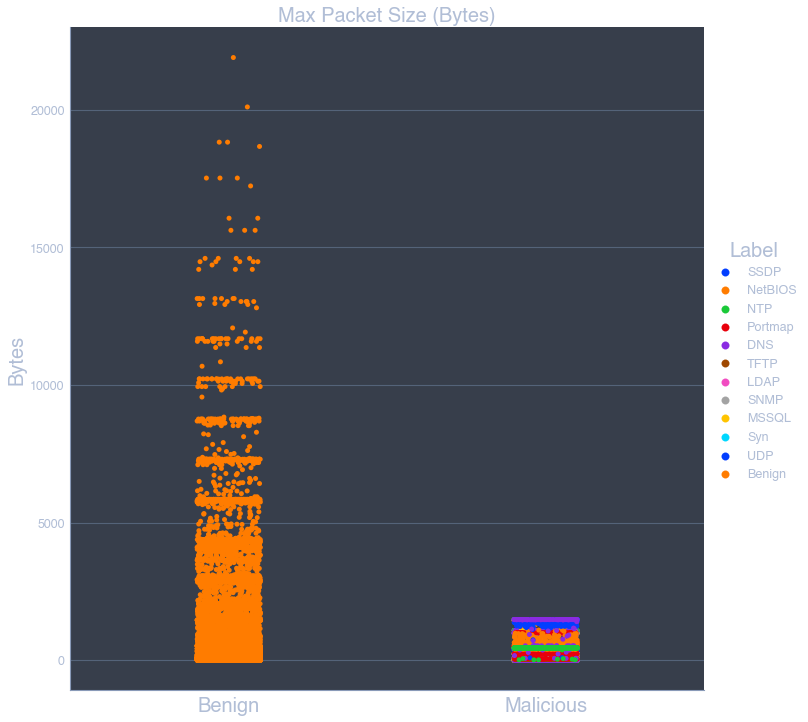

In [57]:
plot = sns.catplot(x='Malicious', y='Pkt_Length_Max', hue='Label', palette='bright', data=balanced_df, height=10, aspect=1)

plt.title('Max Packet Size (Bytes)', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

#plt.savefig('Images/Pkt_Length_Max.png', dpi = 100, bbox_inches='tight')

In [59]:
balanced_df[balanced_df['Malicious'] == 0]['Pkt_Length_Std'].describe()

count    21520.000000
mean       180.873386
std        357.316256
min          0.000000
25%          8.763561
50%         30.672463
75%         98.193505
max       4240.060377
Name: Pkt_Length_Std, dtype: float64

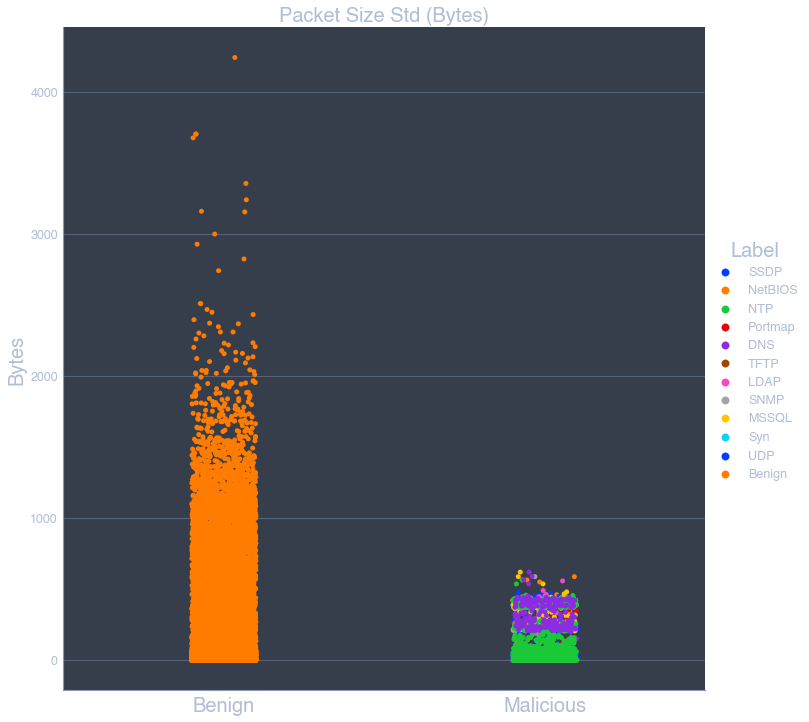

In [60]:
plot = sns.catplot(x='Malicious', y='Pkt_Length_Std', hue='Label', palette='bright', data=balanced_df, height=10, aspect=1)

plt.title('Packet Size Std (Bytes)', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

#plt.savefig('Images/Pkt_Length_Std.png', dpi = 100, bbox_inches='tight')

In [61]:
balanced_df[balanced_df['Malicious'] == 0]['Pkt_Length_Var'].describe()

count    2.152000e+04
mean     1.603842e+05
std      5.387275e+05
min      0.000000e+00
25%      7.680000e+01
50%      9.408000e+02
75%      9.641965e+03
max      1.797811e+07
Name: Pkt_Length_Var, dtype: float64

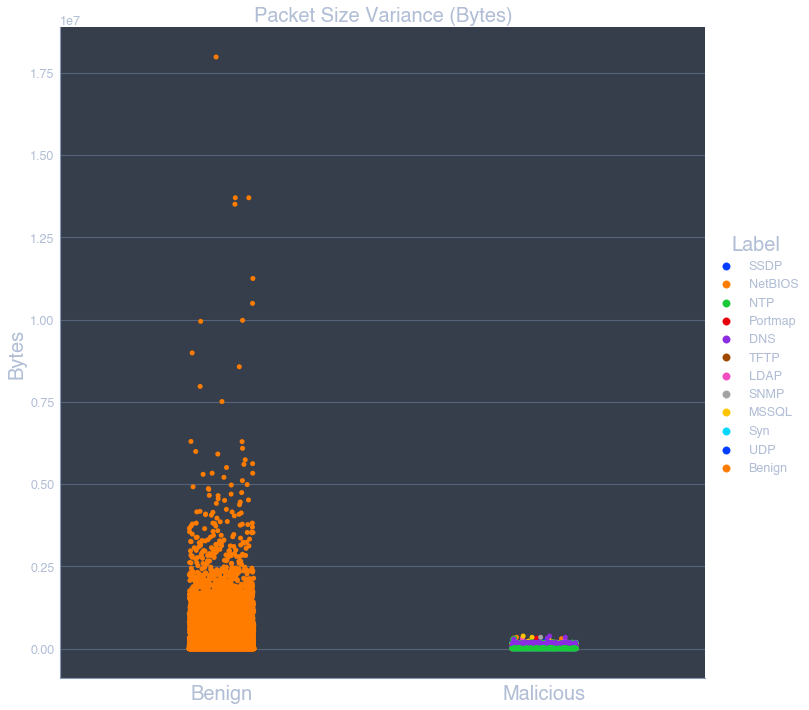

In [62]:
plot = sns.catplot(x='Malicious', y='Pkt_Length_Var', hue='Label', palette='bright', data=balanced_df, height=10, aspect=1)

plt.title('Packet Size Variance (Bytes)', fontsize=20)
plt.xlabel('')
plt.ylabel('Bytes', fontsize=20)
plt.setp(plot._legend.get_title(), fontsize=20)
plot.set_xticklabels(['Benign', 'Malicious'], fontsize=20)

#plt.savefig('Images/Pkt_Length_Var.png', dpi = 100, bbox_inches='tight')

# SQL

In [25]:
engine = sqlalchemy.create_engine('sqlite:///test.sqlite')

In [26]:
df.to_sql(name='test', con=engine, if_exists='replace')